# Simple Linear Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
np.random.seed(SEED)

## Synthetic Data


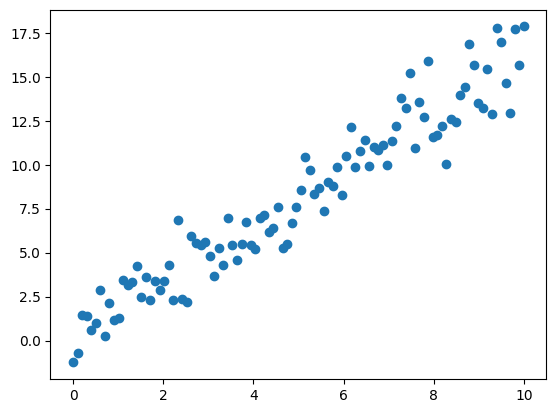

In [6]:
X = np.linspace(0, 10, 100)
y = 1.6 * X + np.random.randn(100) * 1.5

plt.scatter(X, y)
plt.show()

## Define Loss Function


In [9]:
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

## Compute Gradients

Derivaties of Loss L w.r.t. w and b

$ \frac{\partial L}{\partial w} = -\frac{2}{n}\sum\_{i=0}^{n}{x_i(y_i - \hat{y_i})} $

$ \frac{\partial L}{\partial b} = -\frac{2}{n}\sum\_{i=0}^{n}{y_i - \hat{y_i}} $


In [ ]:
def gradients(X, y, y_pred):
    dw = -2 * np.mean(X * (y - y_pred))
    db = -2 * np.mean(y - y_pred)

    return dw, db

## Prediction


In [11]:
def predict(X, w, b):
    return w * X + b

## Gradient Descent


In [33]:
w = 0.0
b = 0.0
lr = 0.01
epochs = 1000

for i in range(epochs):
    y_pred = predict(X, w, b)
    dw, db = gradients(X, y, y_pred)

    w -= lr * dw
    b -= lr * db

    if i % 100 == 0:
        print(f"Epoch {i}: Loss={mse(y, y_pred):.4f}")

Epoch 0: Loss=89.9843
Epoch 100: Loss=1.7413
Epoch 200: Loss=1.7411
Epoch 300: Loss=1.7410
Epoch 400: Loss=1.7410
Epoch 500: Loss=1.7410
Epoch 600: Loss=1.7410
Epoch 700: Loss=1.7410
Epoch 800: Loss=1.7410
Epoch 900: Loss=1.7410


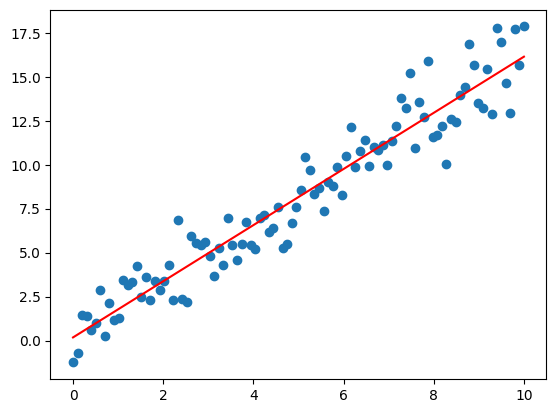

In [34]:
plt.scatter(X, y)
plt.plot(X, predict(X, w, b), color="red")
plt.show()

# Multiple Linear Regression

$ \hat{y} = XW + b $


In [46]:
n_features = 5
n_samples = 100

X = np.random.randn(n_samples, n_features) # (100, 5)
true_w = np.random.randn(n_features) # (5,)
true_b = np.random.randn()

y = X @ true_w + true_b + np.random.randn(n_samples) * 0.5 # (100,) # add noise

print(f"{true_w=}, {true_b=}")
print(y.shape)

true_w=array([ 2.49741513,  0.04600639, -0.64111426,  2.82433059, -1.3189685 ]), true_b=0.020106466869098387
(100,)


In [47]:
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [52]:
def compute_gradients(y, y_pred, X):
    # (5, 100) @ (100,) -> (5,)
    dw = -2 * (X.T @ (y - y_pred)) / n_samples
    db = -2 * np.mean(y - y_pred)
    
    return dw, db

In [61]:
n_epochs = 1000
lr = 0.01
w = np.zeros(n_features) # (5, )
b = 0

for i in range(n_epochs):
    y_pred = X @ w + b
    
    dw, db = compute_gradients(y, y_pred, X)
    
    w -= lr * dw
    b -= lr * db
    
    if i % 100 == 0:
        print(f"Epoch {i}: Loss={mse(y, y_pred)}")


Epoch 0: Loss=15.628151702170028
Epoch 100: Loss=0.6344838868896892
Epoch 200: Loss=0.20482092924857612
Epoch 300: Loss=0.1826039602383767
Epoch 400: Loss=0.18126938234347528
Epoch 500: Loss=0.18118631683979955
Epoch 600: Loss=0.18118109098439875
Epoch 700: Loss=0.18118076095922883
Epoch 800: Loss=0.1811807400870342
Epoch 900: Loss=0.1811807387662234
